##분류

In [80]:
!pip install mglearn 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [81]:
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import mglearn

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [82]:
%matplotlib inline
import pandas as pd
import seaborn as sns           # Seaborn 로딩하기
import matplotlib.pyplot as plt

In [83]:
wisc = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ITB/health_data.csv")

print(wisc.columns)
display(wisc.info())     
display(wisc.head()) 
#1=female, 0=male

Index(['SIDO', 'SEX', 'AGE_GROUP', 'HEIGHT', 'WEIGHT', 'BP_HIGH', 'BP_LWST',
       'BLDS', 'TOT_CHOLE', 'TRIGLYCERIDE', 'HDL_CHOLE', 'LDL_CHOLE', 'HMG',
       'OLIG_PROTE_CD', 'CREATININE', 'SGOT_AST', 'SGPT_ALT', 'GAMMA_GTP',
       'SMK', 'DRK', 'height(m)', 'HEIGHT*2', 'BMI'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4043 entries, 0 to 4042
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SIDO           4043 non-null   int64  
 1   SEX            4043 non-null   int64  
 2   AGE_GROUP      4043 non-null   int64  
 3   HEIGHT         4043 non-null   int64  
 4   WEIGHT         4043 non-null   int64  
 5   BP_HIGH        4043 non-null   int64  
 6   BP_LWST        4043 non-null   int64  
 7   BLDS           4043 non-null   int64  
 8   TOT_CHOLE      4043 non-null   int64  
 9   TRIGLYCERIDE   4043 non-null   int64  
 10  HDL_CHOLE      4043 non-null   float64
 11  LDL_CHOLE  

None

,SIDO,SEX,AGE_GROUP,HEIGHT,WEIGHT,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,TRIGLYCERIDE,...,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,SMK,DRK,height(m),HEIGHT*2,BMI
0,36,0,9,165,60,127,79,90,188,58,...,1.0,1.1,21,27,21,0,0,1.65,2.7225,22.038567
1,41,1,12,155,50,144,89,110,220,171,...,1.0,0.7,18,17,14,0,0,1.55,2.4025,20.811655
2,27,0,9,185,85,114,72,86,234,183,...,1.0,1.1,25,32,26,1,1,1.85,3.4225,24.835646
3,44,0,9,165,80,112,73,250,119,265,...,1.0,0.7,18,20,35,1,1,1.65,2.7225,29.384757
4,41,1,17,150,50,136,65,104,177,61,...,1.0,0.7,42,48,39,0,0,1.50,2.2500,22.222222


In [84]:
wisc.describe() 

,SIDO,SEX,AGE_GROUP,HEIGHT,WEIGHT,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,TRIGLYCERIDE,...,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,SMK,DRK,height(m),HEIGHT*2,BMI
count,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,...,4022.000000,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000,4043.000000
mean,33.824388,0.498887,11.950037,160.822409,62.794954,124.639377,76.490972,103.751422,198.266139,132.813752,...,1.125559,0.856913,27.898837,26.924808,38.135296,0.364333,0.572842,1.608224,2.594850,24.160125
std,12.550239,0.500061,2.283252,9.201689,12.197016,14.739803,9.840721,24.309470,41.950654,92.928160,...,0.503060,0.367349,18.261743,22.801052,57.009290,0.481302,0.494727,0.092017,0.296417,3.491896
min,11.000000,0.000000,9.000000,130.000000,30.000000,78.000000,50.000000,58.000000,70.000000,14.000000,...,1.000000,0.050000,5.000000,2.000000,3.000000,0.000000,0.000000,1.300000,1.690000,14.268728
25%,27.000000,0.000000,10.000000,155.000000,55.000000,114.000000,70.000000,91.000000,169.000000,77.000000,...,1.000000,0.700000,20.000000,16.000000,16.000000,0.000000,0.000000,1.550000,2.402500,22.038567
50%,41.000000,0.000000,12.000000,160.000000,60.000000,124.000000,77.000000,99.000000,197.000000,111.000000,...,1.000000,0.800000,24.000000,21.000000,24.000000,0.000000,1.000000,1.600000,2.560000,23.875115
75%,44.000000,1.000000,13.000000,170.000000,70.000000,134.000000,82.000000,109.000000,225.000000,160.000000,...,1.000000,1.000000,30.000000,31.000000,38.000000,1.000000,1.000000,1.700000,2.890000,26.122449
max,49.000000,1.000000,18.000000,195.000000,120.000000,199.000000,130.000000,473.000000,387.000000,1701.000000,...,6.000000,9.200000,484.000000,477.000000,976.000000,1.000000,1.000000,1.950000,3.802500,39.792388


1    2316
0    1727
Name: DRK, dtype: int64


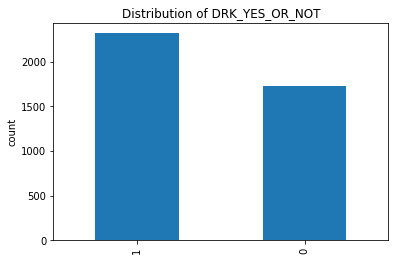

In [85]:
print(wisc['DRK'].value_counts())

wisc['DRK'].value_counts().plot.bar()
plt.ylabel('count')
plt.title('Distribution of DRK_YES_OR_NOT')
plt.show()
#1=YES, 0=NO

In [86]:
xy= wisc[['BMI', 'DRK', 'TOT_CHOLE', 'GAMMA_GTP']]
xy.head()

,BMI,DRK,TOT_CHOLE,GAMMA_GTP
0,22.038567,0,188,21
1,20.811655,0,220,14
2,24.835646,1,234,26
3,29.384757,1,119,35
4,22.222222,0,177,39


In [87]:
x = xy.iloc[:, 1:]
display(x.head())

y = xy.iloc[0]
display(y.head())

,DRK,TOT_CHOLE,GAMMA_GTP
0,0,188,21
1,0,220,14
2,1,234,26
3,1,119,35
4,0,177,39


BMI           22.038567
DRK            0.000000
TOT_CHOLE    188.000000
GAMMA_GTP     21.000000
Name: 0, dtype: float64

##의사결정나무

In [88]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = wisc.iloc[:, 3:10]  # 30개 변수 
y = wisc['DRK']   # target 변수 음부여부 

# 데이터셋을 학습(train)과 테스트(test) 세트로 분할
# random_state : random 으로 분할시 사용되는 난수 seed 숫자
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

tree = DecisionTreeClassifier(random_state=0)  
tree.fit(X_train, y_train)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 1.000
시험용 데이터 정확도: 0.565


In [89]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.686
시험용 데이터 정확도: 0.648


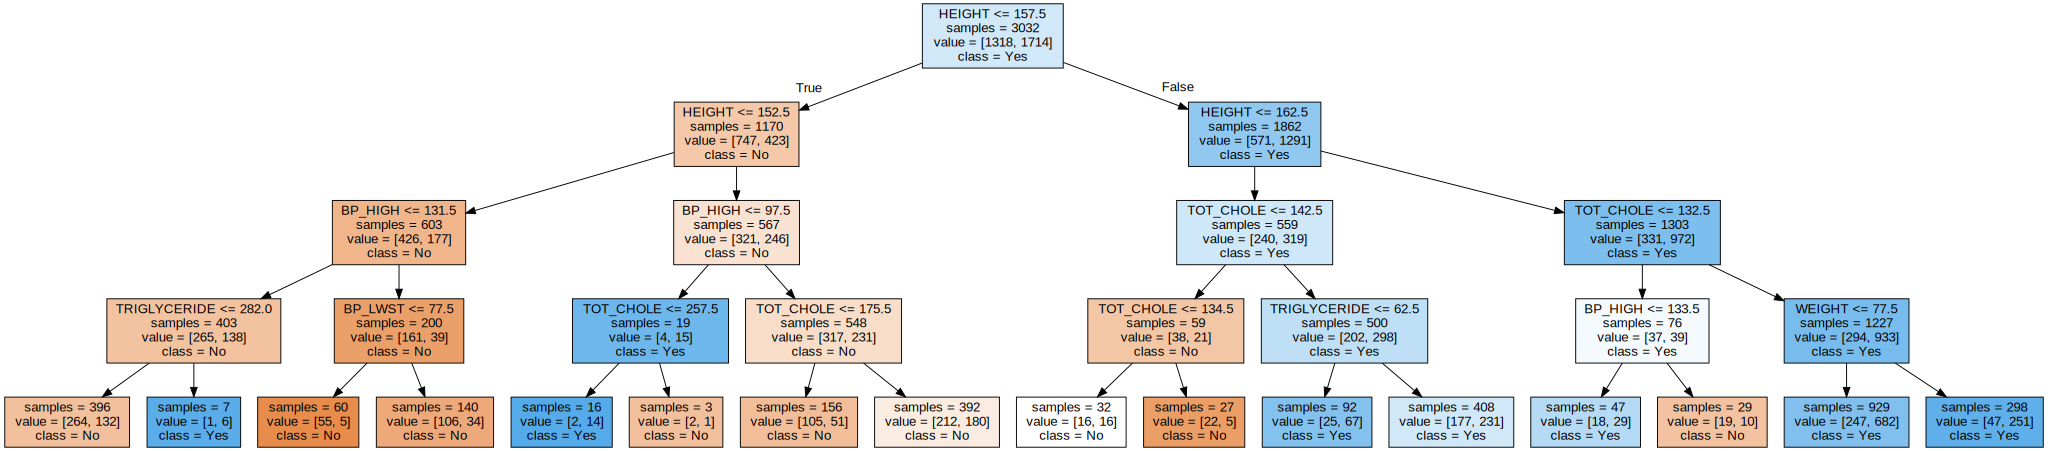

In [90]:
from sklearn.tree import export_graphviz
import graphviz

# filled = True: 색상의 진하기로 클래스를 나타냄, impurity: 불순도 계산값 보여주기 옵션
export_graphviz(tree, out_file="tree.dot", class_names=["No", "Yes"],
                feature_names=X.columns, impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

##주요변수들

In [91]:
result = tree.feature_importances_
print("변수의 중요도:\n", result)

변수의 중요도:
 [0.78938512 0.02150644 0.05475603 0.00870873 0.         0.0941961
 0.03144759]


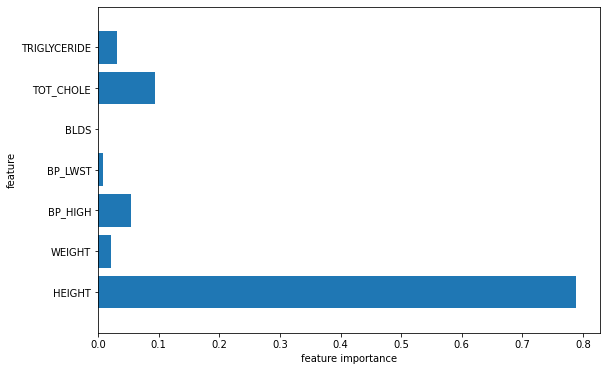

In [92]:
import numpy as np

def plot_feature_importances_wisc(model):
    plt.rcParams["figure.figsize"] = (9,6)
    n_features = len(X.columns)
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X.columns)   # 30개의 눈금을 표시하고 눈금 레이블을 변수 이름으로 지정
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features) #Y 축 범위 지정 (-1 ~ 30)

plot_feature_importances_wisc(tree)

In [93]:
res = pd.DataFrame(result)
res["name"] =  X.columns
display(res.info())

# perimeter_worst의 비중이 가장 큼, 루트 노드에서 이 값부터 사용 
display(res.sort_values(by='name'))  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       7 non-null      float64
 1   name    7 non-null      object 
dtypes: float64(1), object(1)
memory usage: 240.0+ bytes


None

,0,name
4,0.000000,BLDS
2,0.054756,BP_HIGH
3,0.008709,BP_LWST
0,0.789385,HEIGHT
5,0.094196,TOT_CHOLE
6,0.031448,TRIGLYCERIDE
1,0.021506,WEIGHT


##랜덤포레스트

In [94]:
from sklearn.ensemble import RandomForestClassifier


In [95]:
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.648


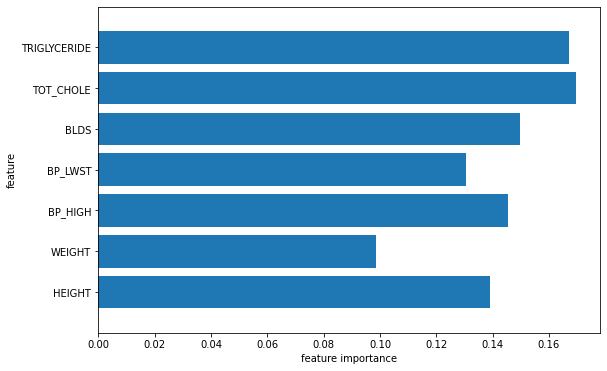

In [96]:
plot_feature_importances_wisc(forest)

In [97]:
from sklearn.model_selection import cross_val_score

# 교차 검증을 10번 수행하여 10번의 교차 검증 평균 정확도를 비교 (10-fold cross validation)
# default cv=5

dt_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 

Accuracy
Decision tree:  [0.66118421 0.63157895 0.69966997 0.65676568 0.669967   0.67986799
 0.64686469 0.68316832 0.65016502 0.67986799]
Random forest:  [0.63815789 0.65131579 0.67656766 0.63036304 0.70627063 0.68646865
 0.65676568 0.669967   0.64356436 0.64356436]
Accuracy mean
Decision tree :0.666
Random forest :0.660


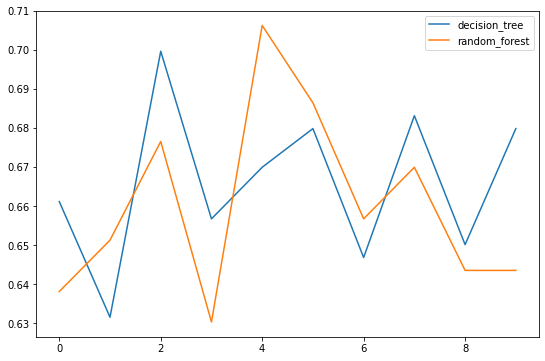

In [98]:
cv_list = [    
            ['decision_tree',dt_scores],
            ['random_forest',rf_scores],
          ]
df = pd.DataFrame.from_dict(dict(cv_list))
df.plot()

##그래디언트 부스트

In [99]:
from sklearn.ensemble import GradientBoostingClassifier
# 기본값은 max_depth= 3, n_estimators=100, learning_rate = 0.1

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [100]:
print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.723
시험용 데이터 세트 정확도: 0.659


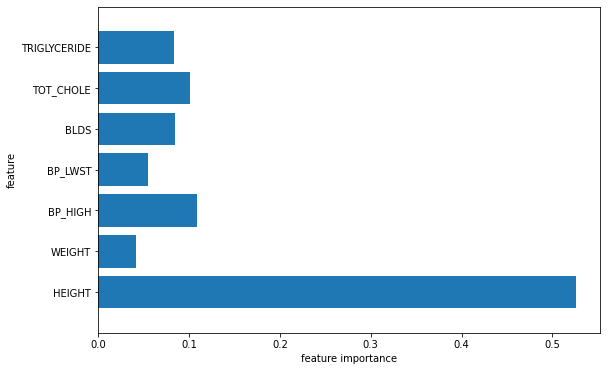

In [101]:
plot_feature_importances_wisc(gbrt)

In [102]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=2)
gbrt.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습 데이터 세트 정확도: 0.695
시험용 데이터 세트 정확도: 0.661


In [103]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습 데이터 세트 정확도: 0.681
시험용 데이터 세트 정확도: 0.657


##교차검증

In [104]:
dt_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='accuracy')
gbrt_scores = cross_val_score(gbrt, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 
print("Gradient boosting: ", gbrt_scores) 

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 
print("Gradient boosting :{:.3f}".format(gbrt_scores.mean())) 

Accuracy
Decision tree:  [0.66118421 0.63157895 0.69966997 0.65676568 0.669967   0.67986799
 0.64686469 0.68316832 0.65016502 0.67986799]
Random forest:  [0.63815789 0.65131579 0.67656766 0.63036304 0.70627063 0.68646865
 0.65676568 0.669967   0.64356436 0.64356436]
Gradient boosting:  [0.68092105 0.66118421 0.71947195 0.65676568 0.67656766 0.69636964
 0.65016502 0.68976898 0.65346535 0.669967  ]
Accuracy mean
Decision tree :0.666
Random forest :0.660
Gradient boosting :0.675


In [105]:
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=10)
#from sklearn.model_selection import RepeatedStratifiedKFold
#kf = RepeatedStratifiedKFold(n_splits=10)

print(kf)

dt_scores = cross_val_score(tree, X_train, y_train, cv=kf, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=kf, scoring='accuracy')
gbrt_scores = cross_val_score(gbrt, X_train, y_train, cv=kf, scoring='accuracy')

print("Accuracy mean -- StratifiedKFold 이용")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 
print("Gradient boosting :{:.3f}".format(gbrt_scores.mean())) 

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
Accuracy mean -- StratifiedKFold 이용
Decision tree :0.666
Random forest :0.660
Gradient boosting :0.675


##그리드서치

In [106]:
from sklearn.model_selection import GridSearchCV

# 파라미터를 dictionary 형태로 설정
parameters = {'max_depth':[1,2,3], 'learning_rate':[0.1,0.08, 0.06, 0.04, 0.02]}

In [107]:
# param_grid의 파라미터들을 3개의 fold 로 나누어 검증
# refit=True (기본값): 가장 좋은 파라미터 설정으로 재학습  
init_gbrt = GradientBoostingClassifier(random_state=0)
grid_gbrt = GridSearchCV(init_gbrt, param_grid=parameters, cv=3, refit=True)
print(grid_gbrt)
# 파라미터들을 순차적으로 학습, 검증
grid_gbrt.fit(X_train, y_train)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_gbrt.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.1, 0.08, 0.06, 0.04, 0.02],
                         'max_depth': [1, 2, 3]})


,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'learning_rate': 0.1, 'max_depth': 1}",0.668863,14,0.675569,0.669634,0.661386
1,"{'learning_rate': 0.1, 'max_depth': 2}",0.673809,5,0.684471,0.674580,0.662376
2,"{'learning_rate': 0.1, 'max_depth': 3}",0.670181,12,0.694362,0.656775,0.659406
3,"{'learning_rate': 0.08, 'max_depth': 1}",0.669194,13,0.672601,0.668645,0.666337
4,"{'learning_rate': 0.08, 'max_depth': 2}",0.677439,2,0.686449,0.674580,0.671287
5,"{'learning_rate': 0.08, 'max_depth': 3}",0.666224,15,0.686449,0.655786,0.656436
6,"{'learning_rate': 0.06, 'max_depth': 1}",0.672822,7,0.677547,0.670623,0.670297
7,"{'learning_rate': 0.06, 'max_depth': 2}",0.674140,4,0.680514,0.674580,0.667327
8,"{'learning_rate': 0.06, 'max_depth': 3}",0.671501,11,0.693373,0.658754,0.662376
9,"{'learning_rate': 0.04, 'max_depth': 1}",0.671504,10,0.677547,0.664688,0.672277


In [108]:
print('GridSearchCV 최적 파라미터:', grid_gbrt.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_gbrt.best_score_))

GridSearchCV 최적 파라미터: {'learning_rate': 0.02, 'max_depth': 3}
GridSearchCV 최고 정확도: 0.6774


In [109]:
print("시험용 데이터 세트 정확도: {:.3f}".format(grid_gbrt.score(X_test, y_test)))

시험용 데이터 세트 정확도: 0.653


## 정오분류표

In [110]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix 

print(y_test.value_counts()) # y_test 의 분포

tree.fit(X_train, y_train)
dt_pred = tree.predict(X_test)
rf_pred = forest.predict(X_test)
grid_gbrt_pred = grid_gbrt.predict(X_test)

# 예측 결과인 pred와 실제 결과인 y_test의 Confusion Matrix 출력
print('Decision tree 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, dt_pred)))
print(confusion_matrix(y_test, dt_pred))
print('Random forest 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, rf_pred)))
print(confusion_matrix(y_test, rf_pred))
print('Gradient boosting 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, grid_gbrt_pred)))
print(confusion_matrix(y_test, grid_gbrt_pred))

1    602
0    409
Name: DRK, dtype: int64
Decision tree 시험용 데이터 세트 정확도:0.648
[[220 189]
 [167 435]]
Random forest 시험용 데이터 세트 정확도:0.648
[[209 200]
 [156 446]]
Gradient boosting 시험용 데이터 세트 정확도:0.653
[[215 194]
 [157 445]]


In [117]:
print('정밀도:{:.3f}'.format(precision_score (y_test, grid_gbrt_pred, average='binary', pos_label=1)))  # pos_label = 1 기본값
print('TP (49) / TP+FP (52) = {:.3f}'.format(49/52))
print('재현율:{:.3f}'.format(recall_score(y_test, grid_gbrt_pred, average='binary', pos_label=1)))
print('TP (49) / TP+FN (51) = {:.3f}'.format(49/51))
print('f1-measure:{:.3f}'.format(f1_score(y_test, grid_gbrt_pred, average='binary', pos_label=1)))
print('2*(정밀도*재현율)/(정밀도+재현율) = {:.3f}'.format(2*0.942*0.961/(0.942+0.961)))

정밀도:0.696
TP (49) / TP+FP (52) = 0.942
재현율:0.739
TP (49) / TP+FN (51) = 0.961
f1-measure:0.717
2*(정밀도*재현율)/(정밀도+재현율) = 0.951


In [118]:
from sklearn.metrics import classification_report

print("Decision Tree:")
print(classification_report(y_test, dt_pred, target_names=["1", "0"]))
print("Random Forest:")
print(classification_report(y_test, rf_pred, target_names=["1", "0"]))
print("Gradient Boosting:")
print(classification_report(y_test, grid_gbrt_pred, target_names=["1", "0"]))
#1=음주 0=음주하지않음

Decision Tree:
              precision    recall  f1-score   support

           1       0.57      0.54      0.55       409
           0       0.70      0.72      0.71       602

    accuracy                           0.65      1011
   macro avg       0.63      0.63      0.63      1011
weighted avg       0.65      0.65      0.65      1011

Random Forest:
              precision    recall  f1-score   support

           1       0.57      0.51      0.54       409
           0       0.69      0.74      0.71       602

    accuracy                           0.65      1011
   macro avg       0.63      0.63      0.63      1011
weighted avg       0.64      0.65      0.64      1011

Gradient Boosting:
              precision    recall  f1-score   support

           1       0.58      0.53      0.55       409
           0       0.70      0.74      0.72       602

    accuracy                           0.65      1011
   macro avg       0.64      0.63      0.63      1011
weighted avg       0.65  

## ROC (Receiver Operator Characteristic) 곡선과 AUC (Area Under the Curve)

[[0.26587729 0.73412271]
 [0.54081633 0.45918367]
 [0.26587729 0.73412271]
 ...
 [0.43382353 0.56617647]
 [0.43382353 0.56617647]
 [0.54081633 0.45918367]]


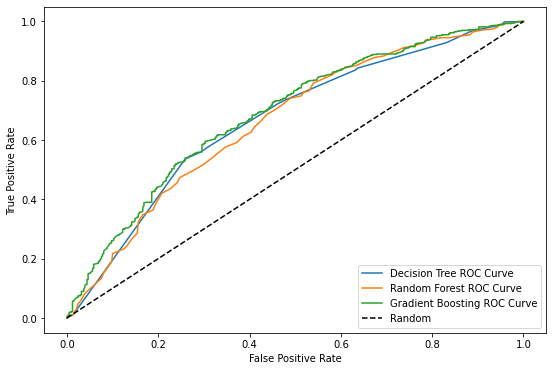

In [120]:
from sklearn.metrics import roc_auc_score, roc_curve

print(tree.predict_proba(X_test))

fpr_dt, tpr_dt, cutoff_dt = roc_curve(y_test, tree.predict_proba(X_test)[:, 1], pos_label=1)
fpr_rf, tpr_rf, cutoff_rf = roc_curve(y_test, forest.predict_proba(X_test)[:, 1], pos_label=1)
fpr_gbrt, tpr_gbrt, cutoff_gbrt = roc_curve(y_test, grid_gbrt.predict_proba(X_test)[:, 1], pos_label=1)

plt.plot(fpr_dt, tpr_dt, label="Decision Tree ROC Curve")
plt.plot(fpr_rf, tpr_rf, label="Random Forest ROC Curve")
plt.plot(fpr_gbrt, tpr_gbrt, label="Gradient Boosting ROC Curve")
plt.plot([0,1], [0, 1], "k--", label ="Random")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend(loc=4)
plt.show() 

In [121]:
auc_dt = roc_auc_score(y_test, tree.predict_proba(X_test)[:, 1])
auc_rf = roc_auc_score(y_test, forest.predict_proba(X_test)[:, 1])
auc_gbrt = roc_auc_score(y_test, grid_gbrt.predict_proba(X_test)[:, 1])
print("Decision Tree의 AUC: {:.3f}".format(auc_dt))
print("Random Forest의 AUC: {:.3f}".format(auc_rf))
print("Gradient Boosting의 AUC: {:.3f}".format(auc_gbrt)) ## AUC 면적이 가장 큰 모델

Decision Tree의 AUC: 0.668
Random Forest의 AUC: 0.663
Gradient Boosting의 AUC: 0.689


##인사이트 도출
타겟변수는 '음주여부'로 지정했다. 신장과 혈색소 등이 중요 변수로 나타났다.

정확도 결과는 
Decision tree :0.666
Random forest :0.660
Gradient boosting :0.675
으로 나왔기 때문에 Gradient Boosting의 정확도가 가장 높은 것을 볼 수 있다.

AUC 값은 
Decision Tree는 0.668, 
Random Forest는 0.663, 
Gradient Boosting은 0.689
로 나왔으므로, Gradient Boosting 모델을 사용한 AUC값이 가장 큰 것을 볼 수 있다.

따라서 Gradient Boosting 모델을 사용했을 떄의 정확도가 가장 높은 것을 알 수 있다.